
## <font color=burntorange>Comparative Analysis of Clustering Algorithms for fracture identification in 2D Spatial Data </font> 
### <font color=blue> Javier Guerrero </font>
##### [LinkedIn](https://www.linkedin.com/in/javier-guerrero812/)| [GitHub](https://github.com/javier-guerrero) | 

#### <font color=green>Subsurface Machine Learning Course, The University of Texas at Austin</font>
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences


_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Ademide Mabadeje, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/ademidemabadeje/)


### Executive Summary
 
This project attempts to identify individual fractures from fracture networks images acquired from X-ray Micro Computed Tomography. The first step to address this challenge is to be able to recognize all the data points (in 2D or 3D) that belong to each of the fractures by performing clustering. I analyzed the performance of several clustering algorithms and found that probabilistic models that assume the data points are generated from a mixture of Gaussian distributions (i.e. Gaussian Mixture and Bayesian Gaussian Mixture) provide the best results. Now that each cluster represents a single fracture, future work can aim to perform dimensionality reduction using PCA in order to fit lines in 2D or planes in 3D that best describe the real geometry of the fractures and use this information as input in Discrete Fracture Network (DFN) modeling software. 

### Import Packages

In [1]:
import numpy as np                         # Library for arrays and matrix math
import matplotlib as mpl                   # Library for plotting
import matplotlib.pyplot as plt            # plotting
from mpl_toolkits.mplot3d import Axes3D    # Plotting in 3D
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN,AgglomerativeClustering, MeanShift   # CLustering methods
from skimage import data, io, color        # Library for image manipulation
from sklearn import mixture                # Bayesian and Bayesian Mixture clustering methods
import warnings                            # Suppress warnings
warnings.filterwarnings('ignore')          # suppress warnings


### Functions

I created a function called ``Clustering_Methods`` that contains all the clustering algortihms analyzed in this project. A description of each method and how they work is presented later in this workflow. This function has 2 parameters:
1. The image dataset subjected to clustering 
2. The number of clusters. This parameter is given because some of the methods (e.g. K-means) need a number of protoypes to be specified

In [2]:
def Clustering_Methods(Dataset, Num_Clusters):          # I created this function that includes all the clustering methods to avoid repeting this code cell
    result  = np.where(Dataset == 255)
    result = np.asarray(result).transpose()
    x = result[:,0]
    y = result[:,1]
    
    # Method 1: K-Means Clustering
    clustering1 = KMeans(n_clusters=Num_Clusters,n_init=100).fit(result)  
    labels1 = clustering1.labels_
    
    # Method 2: Spectral Clustering
    clustering2 = SpectralClustering(n_clusters = Num_Clusters, assign_labels="discretize", n_jobs=-1).fit(result)  
    labels2 = clustering2.labels_
    
    # Method 3: DBSCAN
    clustering3 = DBSCAN(eps=0.5,min_samples=3).fit(result)     
    labels3 = clustering3.labels_
    
    # Method 4: Agglomerative CLustering
    clustering4 = AgglomerativeClustering(n_clusters=Num_Clusters,linkage="complete").fit(result)    
    labels4 = clustering4.labels_
   
    # Method 5: Mean Shift 
    clustering5 = MeanShift(bandwidth=1).fit(result)    
    labels5 = clustering5.labels_

    # Method 6: Gaussian Mixture
    clustering6 = mixture.GaussianMixture(n_components=Num_Clusters,covariance_type='full',max_iter=100,init_params='kmeans').fit(result)    # 
    labels6 = clustering6.predict(result)

    # Bayesian Gaussian Mixture
    clustering7 = mixture.BayesianGaussianMixture(
        n_components=Num_Clusters, covariance_type='full', weight_concentration_prior=1e-2,
        weight_concentration_prior_type='dirichlet_process',
        mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(2),
        init_params="random", max_iter=100, random_state=2).fit(result)
    labels7 = clustering7.predict(result) 

#     clustering8 = mixture.BayesianGaussianMixture(
#       n_components=Num_Clusters, covariance_type='full', weight_concentration_prior=1e+2,
#         weight_concentration_prior_type='dirichlet_process',
#         mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(3),
#         init_params="kmeans", max_iter=300, random_state=2).fit(result)
#     labels8 = clustering8.predict(result)
    
    # This part of the function creates a plot with 6 subplots showing results for all the clustering algorithms
    plt.figure(figsize=(15,10))    # Plot 1 - K-means clustering
    plt.subplot(231)
    plt.scatter(y, -x, c=labels1.astype(float),alpha=0.5)
    # ax.set_aspect(aspect=1)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.xticks([])
    plt.yticks([])
    plt.title('K-Means')

    plt.subplot(232)              # Plot 2 - Spectral CLustering
    plt.scatter(y, -x, c=labels2.astype(float),alpha=0.5)
    # ax.set_aspect(aspect=1)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.xticks([])
    plt.yticks([])
    plt.title('Spectral Clustering')

    plt.subplot(233)             # Plot 3 - DBSCAN
    plt.scatter(y, -x, c=labels3.astype(float),alpha=0.5)
    # ax.set_aspect(aspect=1)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.xticks([])
    plt.yticks([])
    plt.title('DBSCAN')

    plt.subplot(234)             # Plot 4 - Agglomerative Clustering 
    plt.scatter(y, -x, c=labels4.astype(float),alpha=0.5)
    # ax.set_aspect(aspect=1)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.xticks([])
    plt.yticks([])
    plt.title('Agglomerative Clustering')

    plt.subplot(235)             # Plot 5 - Gaussian Mixture 
    plt.scatter(y, -x, c=labels6.astype(float),alpha=0.5)
    # ax.set_aspect(aspect=1)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.xticks([])
    plt.yticks([])
    plt.title('Gaussian Mixture')

    plt.subplot(236)             # Plot 6 - Bayesian Gaussian Mixture
    plt.scatter(y, -x, c=labels7.astype(float),alpha=0.5)
    # ax.set_aspect(aspect=1)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.xticks([])
    plt.yticks([])
    plt.title('Bayesian Gaussian Mixture')
    plt.show()
    
    return    

### Data Description
- The original scope of this project was to use 2D and 3D images that represent features commonly found in the subsurface like fracture networks. 
- Following **Dr. Pyrcz** recomendation, the scope of the project was adjusted to only 2D images because of the file size of the datasets in the **"Digital Rocks Protal at UT Austin"** and also to keep this workflow short and concise.
- The data includes synthetic 2D images that represent some of the most common fracture terminations found in the subsurface.
- The datasets also include 2D images  from a real micro-CT  scan from a Mancos Shale core plug.
- This workflow is not rectricted to microCT  images as it can also be applied to SEM, Medical-CT and even regular photos.
***

## <font color=red>Workflow: <font color=blue>Comparative Analysis of Clustering Algorithms for fracture identification in 2D Spatial Data</font>  
Here is the outline of the worflow:  
1. <a href="#itemA"> Introduce the concept of image as an array</a>       
2. <a href="#itemB">Load the data: Create a repository with multiple datasets for this project </a> 
3. <a href="#itemC">Definition of the different clustering algorithms analayzed in this project  </a> 
4. <a href="#itemD">Test of clustering Algorithms in 2D data.  </a>  
    4.1. 2D synthetic Data  
    4.2. 2D real data from Micro-CT 
5. <a href="#itemE">Summary and Conclusions </a>   

<a id='itemA'></a>
### 1. Concept: Images are multidimensional arrays  
**According to Scikit-learn:** Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array:

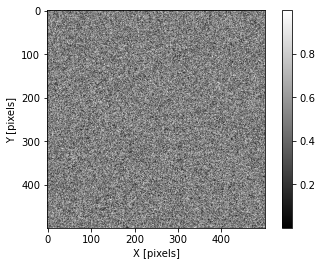

In [3]:
random_image = np.random.random([500, 500])   # creates a random image with size 500 x 500 pixels
                                              # Each pixel is colored in a normalized grayscale (0 = black and 1 = White)
plt.imshow(random_image, cmap='gray')         # Plot the image 
plt.xlabel('X [pixels]')                      # Label for x-axis
plt.ylabel('Y [pixels]')                      # Label for y-axis
plt.colorbar()                                # plot the colorbar showing the grayscale 
plt.show()

Basically a 2D image is a 2D array where each X,Y location (row, column) has a value that represents a feature or property. This feature can be:  
- color  
- X-ray attenautation  
- Density  
- etc  

For the image shown above, we are going to call each X,Y location pixel for images in 2D and voxels for images in 3D  

Let's use the command ``print`` to see the numerical value of the color of each pixel

In [4]:
print(random_image)  # Prints the numericla value of the color of each pixel in a normalized grayscale (0 to 1)

[[0.43252178 0.55682401 0.44870331 ... 0.03855459 0.29828325 0.08105243]
 [0.70632206 0.39988202 0.21831856 ... 0.9292792  0.92661357 0.69499131]
 [0.39002356 0.2611984  0.09099261 ... 0.99061288 0.42259403 0.61252911]
 ...
 [0.76522816 0.96799624 0.03030247 ... 0.61791676 0.659212   0.90294453]
 [0.31968514 0.95365621 0.09205709 ... 0.84732318 0.35768668 0.00122399]
 [0.9048956  0.52258813 0.05867419 ... 0.84387342 0.77085287 0.51565564]]


We can also print some other insightful information about our images 

In [5]:
print("Shape:", random_image.shape)                               # size of the image
print("Values min/max:", random_image.min(), random_image.max())  # min and max values for color intensity

Shape: (500, 500)
Values min/max: 1.6868942877001913e-06 0.9999996591802186


- The shape command indicates the number of pixels in x and y direction  
- The min and max values represent the color range. this is a normalized binary image (black and white) where 0 is black and 1 is white

<a id='itemB'></a>
### 2. Load the Data  
This section loads the 2D/3D images from a github repository. The repository can be accessed here: https://github.com/javier-guerrero/ML_Project_Fall2021 

#### 2D Datasets:  
- Dataset 1 = Synthetic image of 2 intersecting fractures in an X termination
- Dataset 2 = Synthetic image of 3 fractures where 2 of them grow until they intercept ($\lambda$ termination) and 1 independent fracture 
- Dataset 3 = Real image of a subvolume of a Mancos Shale core (micro-CT) with a fracture network. Slice 91
- Dataset 4 = Real image of a subvolume of a Mancos Shale core (micro-CT) with a fracture network. Slice 195

In [6]:
# load the data from my GitHub respository
Dataset1 = io.imread(r'https://www.github.com/javier-guerrero/ML_Project_Fall2021/raw/main/3Fractures.tif') # Dataset 1
Dataset2 = io.imread(r'https://www.github.com/javier-guerrero/ML_Project_Fall2021/raw/main/2Fractures.tif') # Dataset 2
Dataset3 = io.imread(r'https://www.github.com/javier-guerrero/ML_Project_Fall2021/raw/main/Mancos_Nxyz_250_0091.tif') # Dataset 3
Dataset4 = io.imread(r'https://www.github.com/javier-guerrero/ML_Project_Fall2021/raw/main/Mancos_Nxyz_250_0195.tif') # Dataset 4
Dataset5 = io.imread(r'https://www.github.com/javier-guerrero/ML_Project_Fall2021/raw/main/Mancos_Nxyz_250_0229.tif') # Dataset 5

Let's visualize some of the datasets

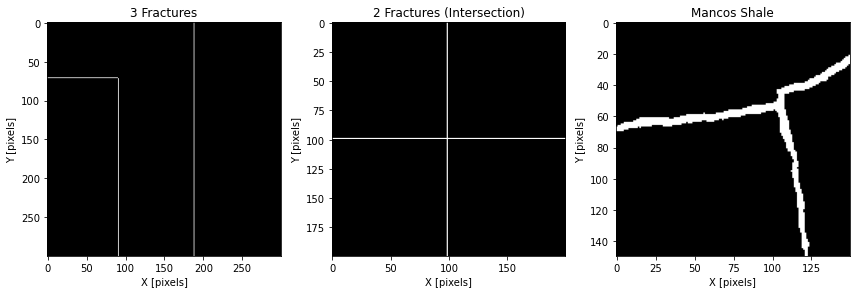

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12,8))  # create a plot with 2 subplots
ax[0].imshow(Dataset1, cmap='gray')          # Subplot 1 for Dataset 1
ax[0].title.set_text("3 Fractures")  
ax[0].set_xlabel('X [pixels]')
ax[0].set_ylabel('Y [pixels]')
ax[1].imshow(Dataset2, cmap='gray')          # Subplot 2 for Dataset 2     
ax[1].title.set_text("2 Fractures (Intersection)")
ax[1].set_xlabel('X [pixels]')
ax[1].set_ylabel('Y [pixels]')
ax[2].imshow(Dataset3, cmap='gray')          # Subplot 3 for Dataset 3     
ax[2].title.set_text("Mancos Shale")
ax[2].set_xlabel('X [pixels]')
ax[2].set_ylabel('Y [pixels]')
fig.tight_layout()
plt.show()

As mentioned before, the images shown in the datasets are segmented. In other words the color black represents the rock matrix and the features in white represent the features of interest (i.e. fractures, pore space)

<a id='itemC'></a>
### 3. Clustering Algorithms  
The following literature review about the clustering algorithms used in this project was made using different bits of information from the following sources: 
1. Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_clustering.ipynb  
2. Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_advanced_clustering.ipynb  
3. Scikit Learn - Clustering:  https://scikit-learn.org/stable/modules/clustering.html  
4. Scikit Learn - Gaussian Mixtures: https://scikit-learn.org/stable/modules/mixture.html#mixture
5. Tutorials Point -  https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_methods.htm 

#### <font color=red> K-Means Clustering </font>  
This algorithm computes the centroids and iterates until it finds optimal centroid. It requires the number of clusters to be specified that’s why it assumes that they are already known. The main logic of this algorithm is to cluster the data separating samples in n number of groups of equal variances by minimizing the criteria known as the inertia. The number of clusters identified by algorithm is represented by 'K'. [Ref [5]](https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_methods.htm)

#### <font color=red> Spectral Clustering </font>  
Before clustering, this algorithm basically uses the eigenvalues i.e. spectrum of the similarity matrix of the data to perform dimensionality reduction in fewer dimensions. This method requires the number of clusters to be specified. Spectral clustering is not advisable when there are large number of clusters.[Ref [5]](https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_methods.htm)

#### <font color=red> DBSCAN </font>  
“Density-based spatial clustering of applications with noise”. This algorithm is based on the intuitive notion of “clusters” & “noise” that clusters are dense regions of the lower density in the data space, separated by lower density regions of data points. There are two important parameters namely min_samples and eps used by this algorithm to define dense. Higher value of parameter min_samples or lower value of the parameter eps will give an indication about the higher density of data points which is necessary to form a cluster. [Ref [2]](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_advanced_clustering.ipynb) [Ref [5]](https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_methods.htm)

#### <font color=red> Agglomerative Hierarchical Clustering </font>  
This algorithm is pat of the hierarchical clustering family. This method requires the number of clusters to be specified. It builds nested clusters by merging or splitting the clusters successively. Agglomerative clustering treats every data point like a single cluster. Then, it successively agglomerates the pairs of clusters. This uses the bottom-up approach.  [Ref [2]](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_advanced_clustering.ipynb) [Ref [5]](https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_methods.htm)


#### <font color=red> Gaussian Mixture  </font>  
A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians. The Gaussian Mixture comes with different options to constrain the covariance of the difference classes estimated: spherical, diagonal, tied or full covariance.[Ref [3]](https://scikit-learn.org/stable/modules/clustering.html) [Ref [4]](https://scikit-learn.org/stable/modules/mixture.html#mixture)

#### <font color=red> Bayesian Gaussian Mixture </font>  
The Bayesian Gaussian Mixture object implements a variant of the Gaussian mixture model with variational inference algorithms. 

Variational inference is an extension of expectation-maximization that maximizes a lower bound on model evidence (including priors) instead of data likelihood. The principle behind variational methods is the same as expectation-maximization (that is both are iterative algorithms that alternate between finding the probabilities for each point to be generated by each mixture and fitting the mixture to these assigned points), but variational methods add regularization by integrating information from prior distributions. This avoids the singularities often found in expectation-maximization solutions but introduces some subtle biases to the model. Inference is often notably slower, but not usually as much so as to render usage unpractical.

Due to its Bayesian nature, the variational algorithm needs more hyper- parameters than expectation-maximization, the most important of these being the concentration parameter weight_concentration_prior. Specifying a low value for the concentration prior will make the model put most of the weight on few components set the remaining components weights very close to zero. High values of the concentration prior will allow a larger number of components to be active in the mixture. [Ref [3]](https://scikit-learn.org/stable/modules/clustering.html) [Ref [4]](https://scikit-learn.org/stable/modules/mixture.html#mixture)

    

#### <font color=red> SUMMARY TABLE </font> 
Modified from reference [3] Scikit Learn - https://scikit-learn.org/stable/modules/clustering.html  

| Method Name              | Parameters                                                   | Scalability                                            | Use case                                              | Geometry (Metric used)           |
|--------------------------|--------------------------------------------------------------|--------------------------------------------------------|-------------------------------------------------------|----------------------------------|
| K-Means                  | Number of clusters                                           | Very large datasets                                    | General purpose even cluster size                     | Distance between points          |
| Spectral Clustering      | Number of clusters                                           | Medium Number of samples Small number of clusters      | Few clusters non flat geometry                        | Graph distance                   |
| DBSCAN                   | Min Number of samples Radius (eps)                           | Very large number of samples Medium number of clusters | Non-flat geometry Uneven cluster size Outlier removal | Distance between nearest points  |
| Agglomerative Clustering | Number of clusters Distance threshold Linkage type  Distance | Large numer of samples and clusters                    | Many clusters Non-Euclidean distance                  | Any pairwise distance            |
| Gaussian Mixtures        | Many                                                         | Not scalable                                           | Flat geometry Good for density estimation             | Mahalanobis distances or centers |

<a id='itemD'></a>
### 4. Test of Clustering Algorithms in 2D Data  
#### 4.1. Synthetic Datsets
- **Dataset 1** - Synthetic Image containing 3 Fractures


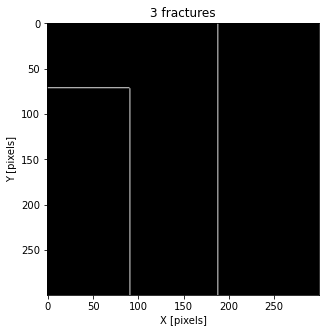

In [8]:
plt.figure(figsize=(5,5))   # creates a figure of size 5 by 5 inches
plt.subplot(111)
plt.imshow(Dataset1, cmap='gray') # Display the image in Dataset 1
plt.title('3 fractures')
plt.xlabel('X [pixels]')              
plt.ylabel('Y [pixels]')  
plt.show()

Let's call our ``Clustering_Methods`` function over the first synthetic dataset

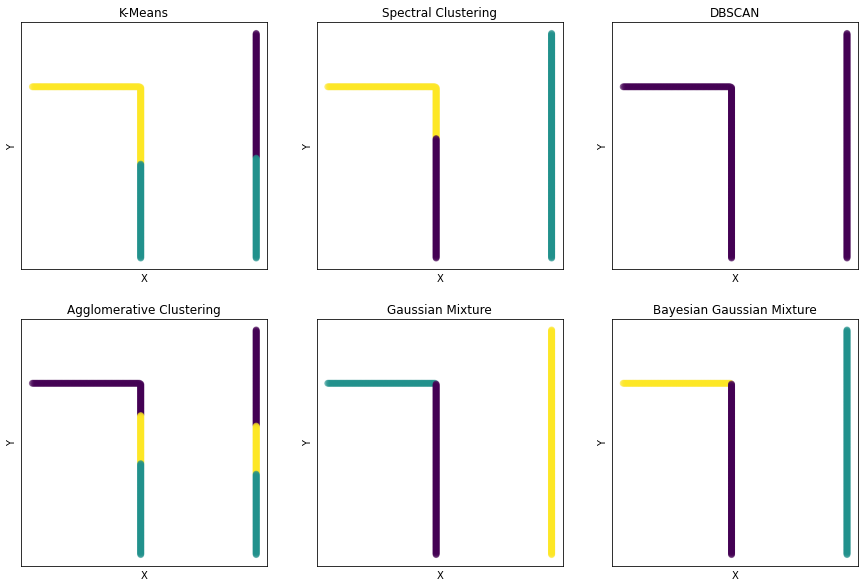

In [9]:
Clustering_Methods(Dataset1,3)

In this dataset, 3 independent fractues should be ecognized. All methods with the exception of DBSCAN are able toi label the data into 3 clusters. However, only Gaussian Mixture and Bayesian Gaussian Mixture can recognize the real shape of each fracture.  
***
- **Dataset 2** - Synthetic Image with 2 intersecting fractures  
Let's visualize the input dataset and apply the ``Clustering_Methods`` function to determine which methods are able to clearly identify both fractures

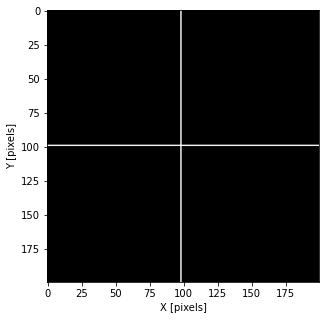

In [10]:
plt.figure(figsize=(5,5))  # Creates a figure 
plt.subplot(111)
plt.imshow(Dataset2, cmap='gray')  # Display the image in Dataset 2
plt.xlabel('X [pixels]')              
plt.ylabel('Y [pixels]') 
plt.show()


Application of ``Clustering_Methods`` function on Dataset 2

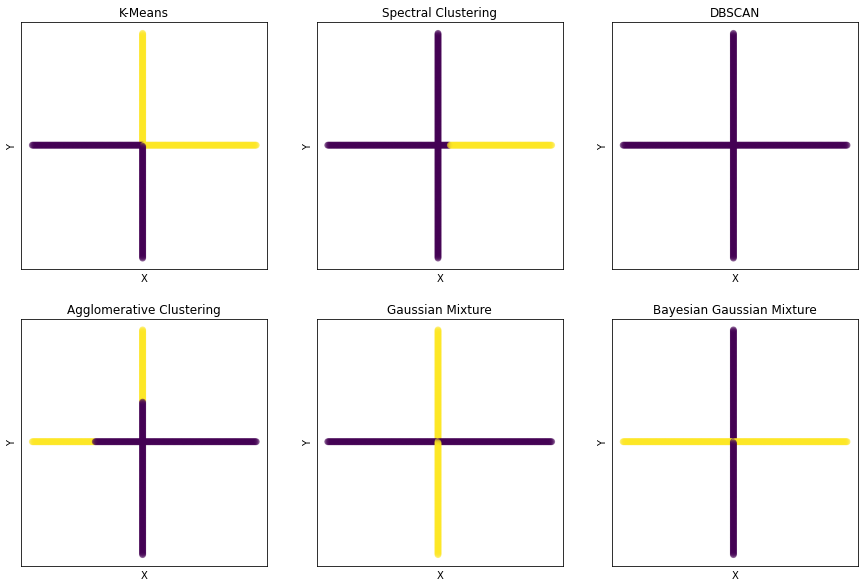

In [11]:
Clustering_Methods(Dataset2, 2)

In this dataset only 2 fractures (1 vertical and 1 horizontal) should be recognized. Once again Gaussian Mixture and Bayesian Gaussian Mixture offer the best results. These 2 methods are very stable and even if the Num_Clusters argument in the  ``Clustering_Methods`` function is set to 3, 4 or even 5, these methods still converge to only 2 clusters.  
<font color=red> Suggestion: Play around with the Num_clusters argument to visualize the meentioned results </font> 
***

#### 4.2. Real Datsets
- **Dataset 3** - Mancos Shale (slice 91) showing a fracture network composed by 3 independent fractures

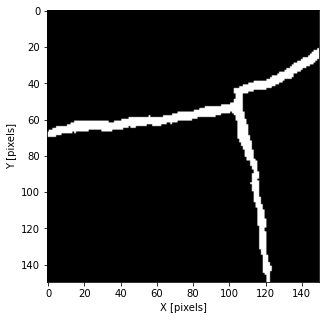

In [12]:
plt.figure(figsize=(5,5))  # Creates a figure of size 5 by 5 inches 
plt.subplot(111)
plt.imshow(Dataset3, cmap='gray')   # Display the image in Dataset 3
plt.xlabel('X [pixels]')              
plt.ylabel('Y [pixels]') 
plt.show()

Let's apply the ``Clustering_Methods`` function on Dataset 3

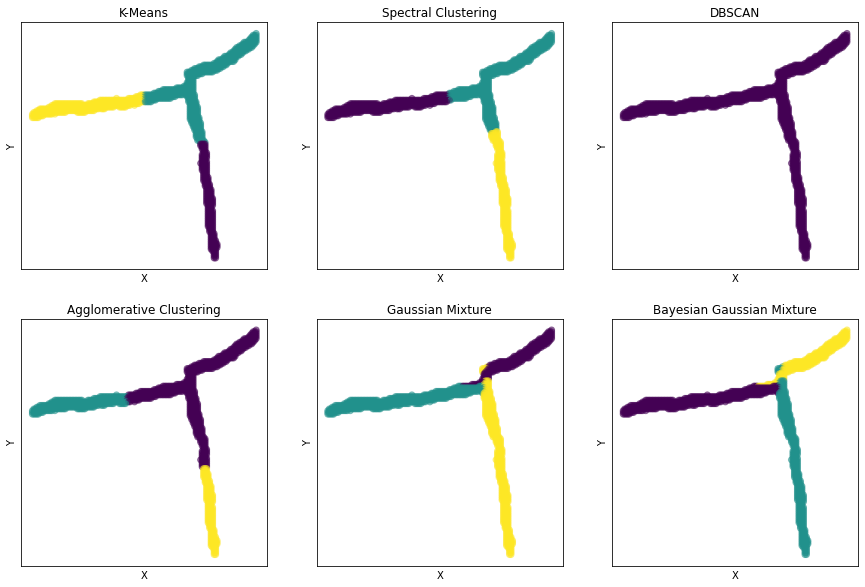

In [13]:
Clustering_Methods(Dataset3, 3)

A 3D image can be imagined as a stack of 2D images. Each of this 2D image is referred to as 'Slice'. Datasets 3 to 5 are slices from the same 3D image from a Mancos Shale core plug that was scanned using X-ray Micro Computed Tomography (micro-CT). In this dataset, 3 independent fracturest merge to form a fracture network. Once again only DBSCAN  fails and only recognize 1 single fracture. Although the other methods create 3 clusters only Gaussian Mixture and Bayesian Gaussian Mixture yield to the right answer. 
***
- **Dataset 4** - Mancos Shale (slice 195) showing a fracture network composed by 3 independent fractures

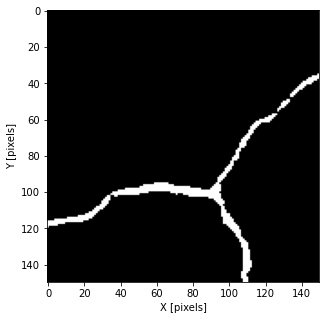

In [14]:
plt.figure(figsize=(5,5))   # Creates a figure of size 5 by 5 inches 
plt.subplot(111)
plt.imshow(Dataset4, cmap='gray') # Display the image in Dataset 4
plt.xlabel('X [pixels]')              
plt.ylabel('Y [pixels]') 
plt.show()

Let's apply the ``Clustering_Methods`` function on Dataset 4

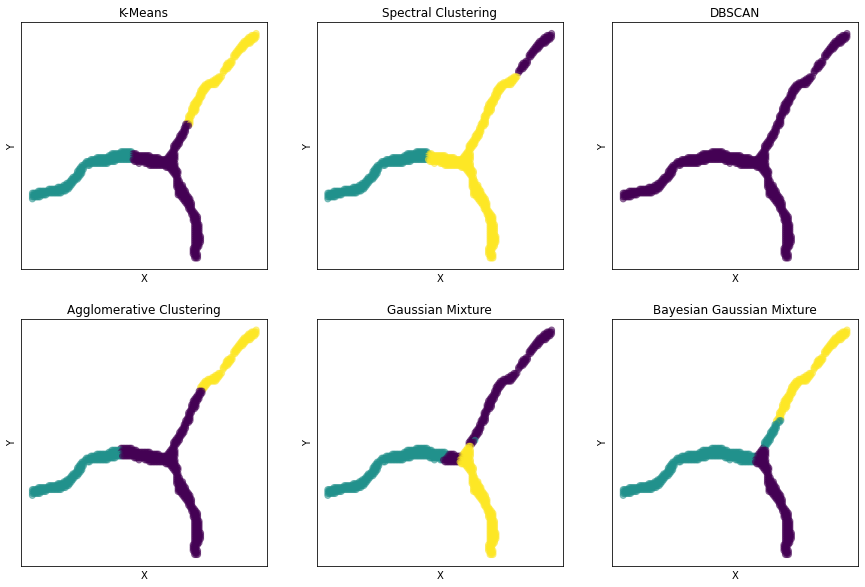

In [15]:
Clustering_Methods(Dataset4, 3)

This dataset is actually very insightful. It shows how when the geometry of the fractures depart from a well defined linear shape then it is more difficult for the clustering algorithms to fully identify the extent of each individual fracture. Once again, Gaussian Mixture and Baysian Gaussian Mixture Algorithms obtained the best results.   
*** 
- **Dataset 5** Mancos Shale (slice 229) shows a **TRUNCATED** fracture network composed by 3 independent fractures

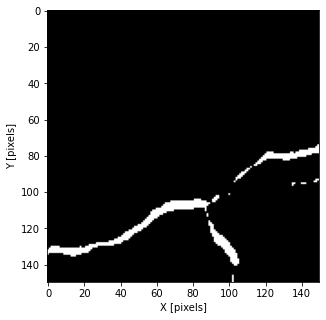

In [16]:
plt.figure(figsize=(5,5))  # Creates a figure of size 5 by 5 inches 
plt.subplot(111)
plt.imshow(Dataset5, cmap='gray')  # Display the image in Dataset 5
plt.xlabel('X [pixels]')              
plt.ylabel('Y [pixels]') 
plt.show()

Let's apply the ``Clustering_Methods`` function on Dataset 5 (Truncated Image)

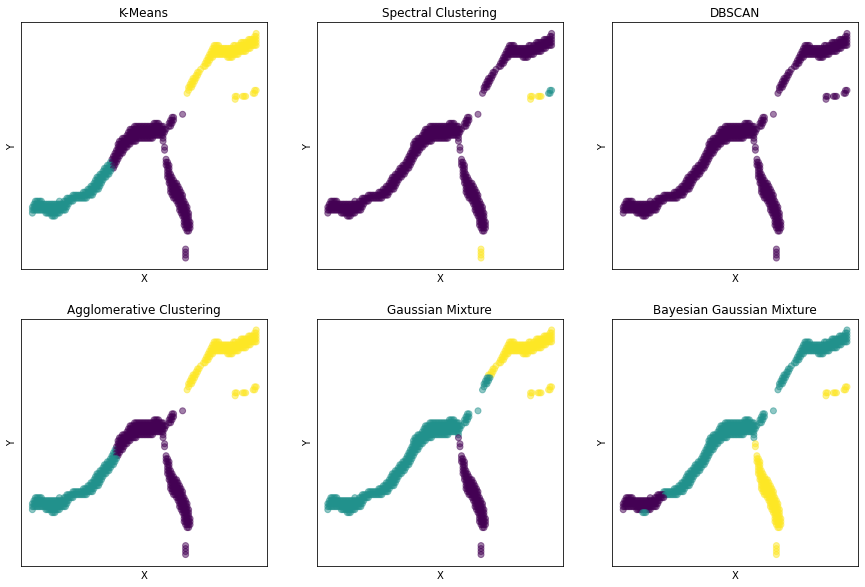

In [17]:
Clustering_Methods(Dataset5, 3)

In this dataset, I wanted to evaluate how the clustering algorithms would perform if the input was a truncated image. In other words, an image where one of the features (fractures) is discontinous. I am actually very happy with the result! Although none of the algorithms make a perfect clustering of the 3 fractures, Gaussian Mixture and BGM  are once again the ones that provide the best results. 

<a id='itemE'></a>
### 5. Results / Analysis
The following table summarizes qualitatively (yes/no indicators) if the clustering algorithms used in this project were able to segment the desired fractures  

| Dataset |  K-Means |  Spectral |DBSCAN  |  Agglomerative |  Gaussian Mixture | Bayesian Gaussian Mixture  |
|---|---|---|---|---|---|---|
| Dataset 1 Synthetic | No  | No  | No  | No  | Yes | Yes  |
| Dataset 2 Synthetic | No  | No  | No  | No  | Yes | Yes  |
| Dataset 3 Real | No  | No  | No  | No  | Yes | Yes  |
| Dataset 4 Real  |  No  | No  | No  | No  | Yes | Yes  |
| Dataset 5 Real with truncation |  No  | No  | No  | No  | Yes | No  |

- As previously stated, six different clustering algorithms were studied including: k-means, Spectral Clustering, DBSCAN, Agglomerative Clustering, Mean Shift, Gaussian Mixture and Bayesian Gaussian Mixture.
- All of them are included in the **scikit-learn** library for Python. Even though these algorithms are widely used in machine learning, none of them are completely automated; hence, they still need user-defined inputs.
- Initially, I tried to apply the clustering algorithms directly ove the images. As the images are binarized (0 = black, 255= white in a 10 bit color scale) methods like K-means were only able to label the data into 2 clusters regardless of the specified number of clusters in the code. 
- I realized that instead of clustering the phases themselves from the image, I needed to supply the algorithm with the locations of the points that form the fracture phase.Therefore, we extracted only the points with a phase value equal to the fracture discrete value and assigned them a position in space based on their indices.
- The resulting matrix contains the x, y, z locations of all pixels/voxels in the fracture network. These x, y, z coordinates are all referenced to the same origin, therefore the matrix represents a point cloud.
- The most satisfactory result came from the Gaussian Mixture and Bayesian Gaussian Mixture clustering with random initialization of weights, means, and precision. 
- I need to acknowledge the fact that determining k without user input has not been addressed. Using this approach, k is the number of fractures in the image to be analyzed. In the case of obvious fractures, regardless of their geometry, it is easy for the user to determine the value of k. The Bayesian Gaussian Mixture clustering algorithm seems to be able to recognize the fractures relatively well compared to the other algorithms tested.
- DBSCAN does not provide good results in this type of datasets because all the points that belong to the fracture are part of a continous feature. Therefore, all the points will be directly density reachable or density reachable and only 1 cluster will emerge. 
- The limitation of K-means such as spherical, convex and isotropic clusters make this method inaccurate for this type of data.
- Finally, this project proved to be succesful in finding at least one clustering algorithm that can be used to identify individual fractures from subsurface images. 
- Future work can be done on finding the lines for images in 2D and regular planes (polygons) for 3D images that best describe the fractures within the real images. Perhaps by applying PCA to the resulting clusters. Hopefully from these lines/planes some inputs like for instance position of vertices and dipping angles can be be extracted to use as inputs for Discrete fracture Network modeling. 

***
I hope this workflow is helpful not only to petroleum engineers and geoscientists but also to all the community that works in image analysis.

#### JAVIER GUERRERO  
I am a Ph.D. student in Petroleum Engineering at The University of Texas at Austin. My research interests include Reservoir Engineering, reservoir simulation, geomechanics, digital petrophysics, machine learning and data science applied to Oil and Gas. Let's connect over social media to discuss future projects, internships or full-time positions. HOOK 'EM HORNS!
##### [LinkedIn](https://www.linkedin.com/in/javier-guerrero812/)| [GitHub](https://github.com/javier-guerrero) | 
___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
